In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
import numpy as np


studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities  = 'Extracurricular Activities'

df = pd.read_csv(studentsDS)
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str.lower(x) == 'yes' else 0)

print(df[extraActivities].head())
# print(encoded.head())
# print(ds.info())
# print(encoded.describe())


studentsDS = '../data/sample-files/USCI/st-perf-10000.csv'
extraActivities = 'Extracurricular Activities'
y_train_column = 'Performance Index'

# Load data
df = pd.read_csv(studentsDS)

# Encode 'Extracurricular Activities' as binary
df[extraActivities] = df[extraActivities].map(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Separate target and features BEFORE scaling
y = df[[y_train_column]]  # keep it as DataFrame to scale later
X = df.drop(columns=[y_train_column])

# Scale features
# x_scaler = StandardScaler()
# X_scaled = x_scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled, columns=X.columns)


# # Scale target
# y_scaler = StandardScaler()
# y_scaled = y_scaler.fit_transform(y)
# y = pd.Series(y_scaled.flatten(), name=y_train_column)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=242)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=242)

# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_cv:", X_cv.shape)
print("y_cv:", y_cv.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64
X_train: (6000, 5)
y_train: (6000, 1)
X_cv: (2000, 5)
y_cv: (2000, 1)
X_test: (2000, 5)
y_test: (2000, 1)


Max Tiers 100000
MSE: 4.182123218726793
R² score: 0.9886651696968835


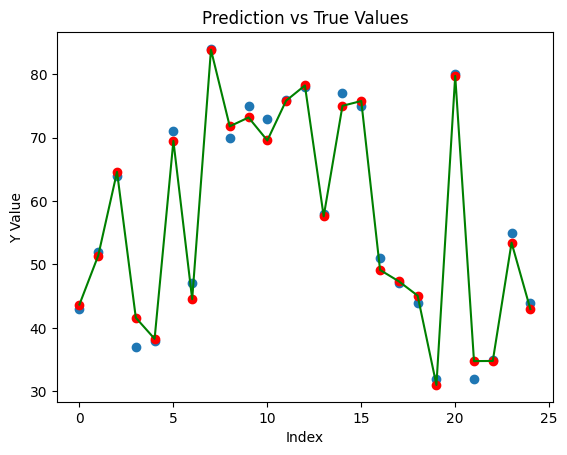

In [38]:
degree =1
epochs = 100000
training_sample_size = 6000


X_train_sample = X_train[:training_sample_size].to_numpy()
y_train_sample = y_train[:training_sample_size].to_numpy()



model = make_pipeline(PolynomialFeatures(degree), 
                      StandardScaler(),
                      SGDRegressor(max_iter=epochs, tol=None,learning_rate='constant', eta0=0.001, random_state=42))

model.fit(X_train_sample, y_train_sample.ravel())

y_pred = model.predict(X_train_sample)

mse = mean_squared_error(y_train_sample.ravel(), y_pred)
r2 = r2_score(y_train_sample.ravel(), y_pred)

print('Max Tiers', model.named_steps['sgdregressor'].n_iter_)
print("MSE:", mse)
print("R² score:", r2)


plottingSample = 25

plt.scatter(range(plottingSample), y_train_sample[:plottingSample], label='True Y')
plt.scatter(range(plottingSample), y_pred[:plottingSample],color='red' )
plt.plot(range(plottingSample), y_pred[:plottingSample], label='Predicted Y (Line)', color='green')
plt.title('Prediction vs True Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
# plt.legend()
plt.show()


# MSE: 4.176932336058299
# R² score: 0.988679238573168
